<a href="https://colab.research.google.com/github/Nargis45/Data_Analysis/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Visualization Assignmnet.xlsx')

In [ ]:
#printing first 5 rows to understand the data
dataset.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore


In [ ]:
#to get number of rows and columns
dataset.shape

(111, 4)

In [ ]:
#to find if there is any null values present in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    float64       
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ KB


Text(0, 0.5, 'no. of units')

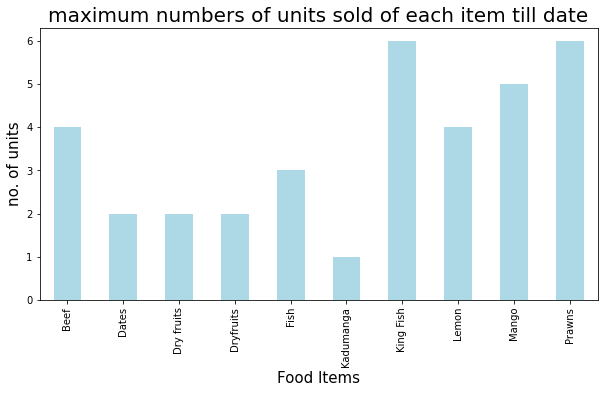

In [ ]:
#using bar plot to display maximum numbers of units sold of each item till date
# Create the figure object 
ax = dataset.groupby(['DESCRIPTION'])['UNIT'].max().plot.bar(
    figsize = (10,5),
    fontsize = 10,
    color='lightblue'
)

# Set the title
ax.set_title("maximum numbers of units sold of each item till date", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Food Items", fontsize = 15)
ax.set_ylabel("no. of units", fontsize = 15)

In [ ]:
test=dataset.groupby(['DATE'])['UNIT'].sum()
test.reset_index()

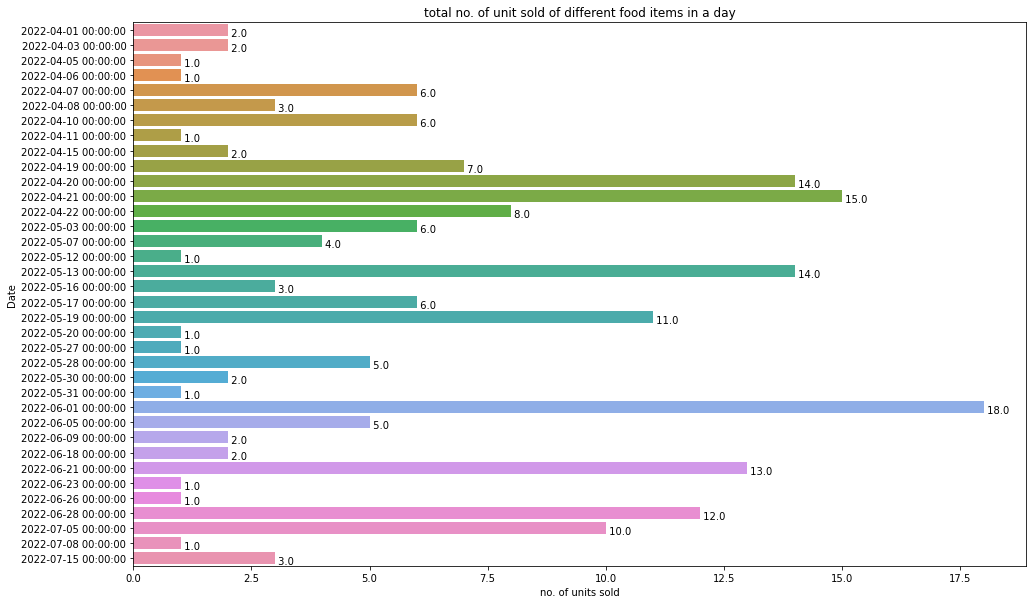

In [ ]:
#using bar plot to display total no. of unit sold of different food items in a day
plt.figure(figsize=(16,10))
ax = sns.barplot(x=test, y=test.index)

plt.xlabel("no. of units sold")
plt.ylabel("Date");
plt.title('total no. of unit sold of different food items in a day');

for patch in ax.patches:
    width = patch.get_width() # it get's the width of the bar
    height = patch.get_height() # it get's the height of the bar
    x = patch.get_x()# It get's the x coordinate from where the bar starts 
    y = patch.get_y()# It get's the y coordinate from where the bar starts
    
    plt.text(width + x, height + y, ' {:.1f} '.format(width)) # It finds the x and y coordinte where the text will be written.

In [ ]:
#filtering the data where place is having non-null values
place_name_dataset = dataset[dataset['PLACE'].isnull()==False]
place_name_dataset

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore
...,...,...,...,...
98,2022-06-26,Prawns,1.0,Kochi
99,2022-06-28,Prawns,4.0,Kottayam
100,2022-06-28,Fish,3.0,Kottayam
101,2022-06-28,King Fish,1.0,Kottayam


In [ ]:
#finding out the total numbers of units sold of each item till date
total_item=place_name_dataset.groupby('DESCRIPTION')['UNIT'].sum().sort_values(ascending=False)
total_item

DESCRIPTION
Prawns        52.0
Beef          50.0
King Fish     19.0
Mango         19.0
Fish          17.0
Lemon          8.0
Dates          4.0
Dryfruits      4.0
Dry fruits     3.0
Kadumanga      1.0
Name: UNIT, dtype: float64

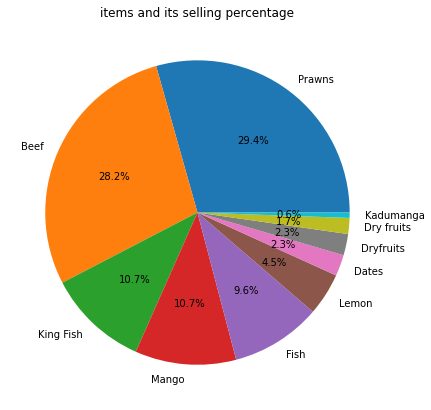

In [ ]:
#using pie chart to represent items and its selling percentage
plt.figure(figsize=(7,7))
plt.pie(list(total_item),labels=list(total_item.keys()),autopct='%0.1f%%')
plt.title('items and its selling percentage')
plt.show()

In [ ]:
#finding out top 5 places and its famous item on the basis of maximum number of units sold in a day
place_name_dataset.groupby(['PLACE','DESCRIPTION'])['UNIT'].max().sort_values(ascending=False)[0:5]

PLACE                 DESCRIPTION
Eloor                 Prawns         6.0
Thrissur/ Guruvayoor  King Fish      6.0
To Kottayam           Mango          5.0
malappuram            Prawns         4.0
To Kottayam           Beef           4.0
Name: UNIT, dtype: float64

Text(0, 0.5, 'no. of units')

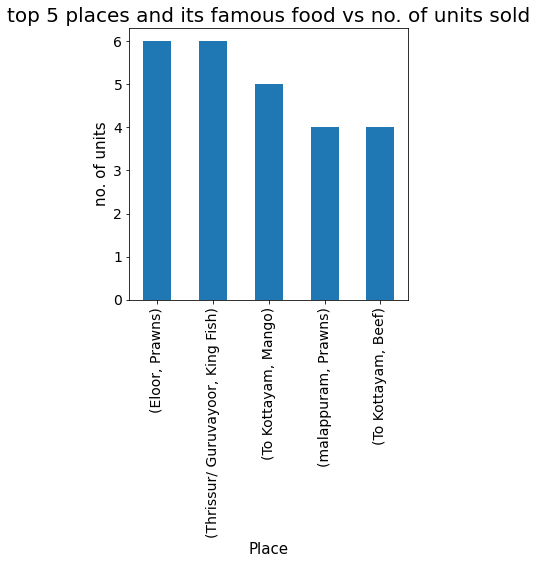

In [ ]:
#plotting the bar plot for the same
# Create the figure object 
ax = place_name_dataset.groupby(['PLACE','DESCRIPTION'])['UNIT'].max().sort_values(ascending=False)[0:5].plot.bar(
    figsize = (5,5),
    fontsize = 14
)

# Set the title
ax.set_title("top 5 places and its famous food vs no. of units sold", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Place", fontsize = 15)
ax.set_ylabel("no. of units", fontsize = 15)

In [ ]:
place_name_dataset.groupby('DESCRIPTION')['UNIT'].sum().sort_values(ascending=False)[0:5]

DESCRIPTION
Prawns       52.0
Beef         50.0
King Fish    19.0
Mango        19.0
Fish         17.0
Name: UNIT, dtype: float64

In [ ]:
#finding top 5 most selling items and total number of units sold till date
max_unit=place_name_dataset.groupby('DESCRIPTION')['UNIT'].sum().sort_values(ascending=False)[0:5]
max_unit=max_unit.to_frame()
max_unit=max_unit.rename(columns={'DESCRIPTION':'Food_Items'})
max_unit

,UNIT
DESCRIPTION,
Prawns,52.0
Beef,50.0
King Fish,19.0
Mango,19.0
Fish,17.0


[Text(0.5, 1.0, 'top 5 most selling items vs total number of units sold till date')]

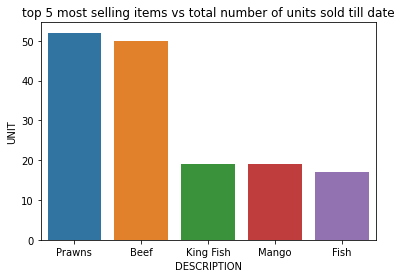

In [ ]:
#using bar plot to find top 5 most selling items and total number of units sold till date
sns.barplot(x =max_unit.index, y =max_unit.UNIT).set(title="top 5 most selling items vs total number of units sold till date")

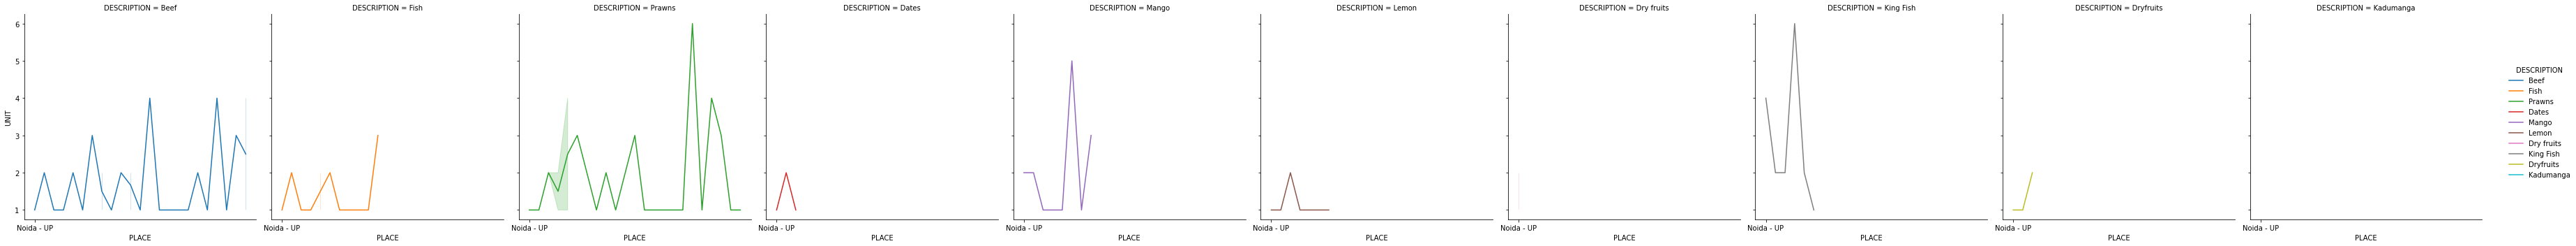

In [ ]:
#places vs no of unit sold of different items using line plot
sns.relplot(x ='PLACE', y = 'UNIT', data = dataset, kind = 'line',hue = 'DESCRIPTION',col='DESCRIPTION')
plt.show()

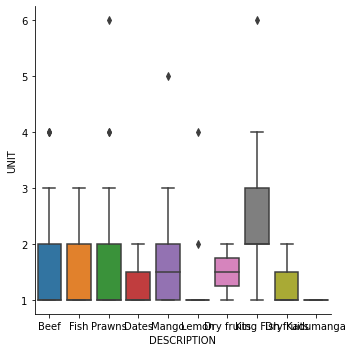

In [ ]:
#description vs no of unit sold using box plot
sns.catplot(x ='DESCRIPTION', y = 'UNIT', data = dataset, kind = 'box')
plt.show()